# A Digital Twin of a Water Flow Meter

<a target="_blank" href="https://colab.research.google.com/github/riacheruvu/wwcode-challenge-2024/blob/main/Day1_Simple_Digital_Twin_of_a_Water_Flow_Meter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Author: Ria Cheruvu

Date: 1/8/2024

In this very short and simplified example, we're going to create an analytical model to use as a digital twin for a water flow meter.

A water flow meter is a device that measures the flow rate of water in pipes to monitor and control the flow of water in a pipe. The result is measured in cubic feet per second.

For this use case, we are using a digital twin of a water flow meter to **predict volumetric water flow rate (target variable)** for different situations not in our ground truth data.

We use two parameters as input to the analytical model for our digital twin:

1. The diameter of the pipe that the water meter is monitoring.
2. The velocity of the water flowing through the pipe.

**Please note:** This is a very simplified example and isn't intended to be fully accurate.

## Step 1: Create a synthetic dataset for my digital twin.

Here, I create a hypothetical dataset that contains values a water meter could have recorded. I create a dataframe with data on my parameters (diameter and velocity) and target variable (flow rate).

**Note:** I am substracting some quantities from the flow rate column (5.93-0.3, 6.28-0.2) here. For these values, I am acting as if the water pipe I am gathering data from became clogged with chemicals, affecting the flow rate. We'll see the effect of this later.

In [1]:
import pandas as pd

data = {'diameter': [8, 8, 8, 8],
        'velocity': [16, 17, 18, 19],
        'flow_rate': [5.59, 5.93-0.3, 6.28-0.2, 6.63]}

df = pd.DataFrame(data)

print(df)

   diameter  velocity  flow_rate
0         8        16       5.59
1         8        17       5.63
2         8        18       6.08
3         8        19       6.63


## Step 2: Create an analytical model for my digital twin.

We will now calculate the flow rate using the volume flow rate formula:
*A (area) x v (velocity) = Q (flow rate)*

Where *A = pi x (diameter)²/ 4*.

The resulting volumetric flow rate is measured in cubic feet per second.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the water flow rate
#This is the simplified digital twin!
def calculate_flow_rate(diameter, velocity):
    # Constants
    pi = 3.1415926
    # Calculate the volumetric flow rate
    #Step 1: Calculate the area
    area = pi * ((diameter/12)**2) / 4
    #Step 2: Calculate the volumetric flow rate
    volumetric_flow_rate = area * velocity
    return volumetric_flow_rate

Now, let's use the simple analytical model for inference!

In [3]:
# Define the parameters
diameter = 8 # inches
velocity = 16 # feet per second

# Calculate the water flow rate using our analytical model - digital twin
flow_rate = calculate_flow_rate(diameter, velocity)

# Print the result
print(f"Water is flowing through the pipe at a rate of **{flow_rate:.2f}** cubic feet.")

Water is flowing through the pipe at a rate of **5.59** cubic feet.


I'm now going to run the digital twin analytical model on a range of velocity values (16 to 21 feet per second), and see if:
1. The digital twin can accurately estimate the volumetric flow rate compared to the sythetic ground truth data.
2. If the digital twin can predict the flow rate for velocities not in my original ground truth dataset.

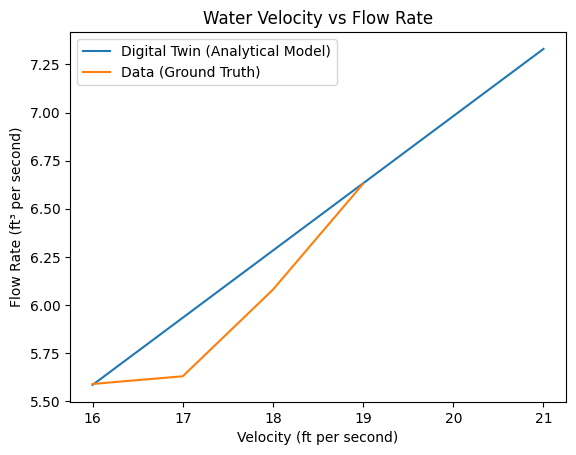

In [4]:
# Define the parameters for the digital twin
diameter = 8 #we keep this constant
velocity = np.linspace(16, 21, 100) #we define a range of velocities

# Calculate the water flow rate for different pressures
flow_rate = calculate_flow_rate(diameter, velocity)

# Plot the results
plt.plot(velocity, flow_rate, label='Digital Twin (Analytical Model)')
plt.plot(data["velocity"], data["flow_rate"], label="Data (Ground Truth)")
plt.xlabel("Velocity (ft per second)")
plt.ylabel("Flow Rate (ft³ per second)")
plt.title("Water Velocity vs Flow Rate")
plt.legend()
plt.show()

Result: Our analytical model (blue) is doing a fairly accurate job of estimating the accurate flow rate that we got from the ground truth (orange).

**But why does the ground truth data (orange) diverge from the analytical model (blue)? **

Because of the real world. You may recall, I substracted some quantities from the synthetic data in step 1, acting as if the water pipe I am gathering data from became clogged with chemicals, affecting the flow rate.

Theoretical flow rate values from the analytical model may not always match the real world values from my dataset. If the pipe wasn't clogged, my model would be spot on. In this case, I didn't consider a clogged pipe would be a part of my data, and I didn't include it in my analytical model.

I could train a deep learning model to take on this task as a next step for a hybrid digital twin!